# VPN detection using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [2]:
df = pd.read_csv("../final_datasets/vpn_iscx_multiclass.csv")

In [3]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,10.8.8.178,134.170.25.26.,54269,443,1.433357e+09,1.433357e+09,CHAT,1,0,...,60.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000
1,1,134.170.25.26,10.8.8.178.,443,54269,1.433357e+09,1.433357e+09,CHAT,1,0,...,61.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000
2,2,157.56.52.13,10.8.8.178.,40011,56909,1.433357e+09,1.433357e+09,CHAT,3,0,...,60.673992,5.333333,0.340934,7.299830,21.411289,10.705644,0.488201,20.923088,1.000000,1.000000
3,3,10.8.8.178,157.56.52.13.,56909,40011,1.433357e+09,1.433357e+09,CHAT,3,0,...,61.340579,1.000000,0.336774,7.119728,21.140954,10.570477,0.218230,20.922724,1.000000,1.000000
4,4,134.170.25.26,10.8.8.178.,443,54269,1.433357e+09,1.433357e+09,CHAT,1,0,...,209.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23073,23073,10.8.8.138,74.125.226.56,54576,443,1.432323e+09,1.432323e+09,FileTrasfer,4,3,...,781.601104,1.347383,0.613228,0.168102,0.274126,0.045688,0.000660,0.207983,2.000000,0.571429
23074,23074,10.8.8.138,74.125.226.56.,51142,443,1.432323e+09,1.432323e+09,FileTrasfer,14,0,...,182.759600,7.981362,0.180433,32.746354,181.487506,13.960577,0.000169,45.223991,1.384615,1.000000
23075,23075,10.8.8.138,74.125.226.56.,51143,443,1.432323e+09,1.432323e+09,FileTrasfer,4,0,...,60.000000,0.000000,0.499995,5.220416,10.440947,3.480316,0.219642,10.001434,0.000000,1.000000
23076,23076,74.125.226.56,10.8.8.138.,443,51142,1.432323e+09,1.432323e+09,FileTrasfer,12,0,...,94.707004,5.449900,0.210067,38.124458,181.487463,16.498860,0.000038,45.226207,0.909091,1.000000


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [6]:
df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code")

,LABEL,LABEL_code
0,CHAT,0
117,EMAIL,1
3626,FileTrasfer,2
22318,P2P,3
15686,STREAMING,4
578,VOIP,5


In [7]:
classifications_array = []
for index, row in df[["LABEL", "LABEL_code"]].drop_duplicates().sort_values("LABEL_code").iterrows():
    classifications_array.append(row[0])
classifications_array

['CHAT', 'EMAIL', 'FileTrasfer', 'P2P', 'STREAMING', 'VOIP']

In [8]:
df = df[["LABEL_code"] + features].copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [10]:
df.shape

(23078, 25)

In [11]:
df_validation = df.sample(n = 5000)
df_features =  df[~df.isin(df_validation)].dropna()

In [12]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [14]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred,average='weighted')
        if verbose is True:
            print ("SCORE:", accuracy, "  ", space)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 50, 5),
        'gamma': hp.uniform ('gamma', 1,10),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 450, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [15]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [12:27<00:00,  7.48s/trial, best loss: -0.9319905305447963]
The best hyperparameters are :  

{'colsample_bytree': 0.7687228117640056, 'gamma': 1.2671358168048925, 'max_depth': 20.0, 'min_child_weight': 18.0, 'n_estimators': 100.0, 'reg_alpha': 0.0, 'reg_lambda': 0.7567024960441245}


In [16]:
def XGBoost_classification_tunned_old(best_hyperparams, X_train=None, X_test=None, y_train=None, y_test=None):
      if X_train is None:
            X=df_features[features]  # Features
            y=df_features['LABEL_code']  # Labels
            #Split on train and test
            X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
            X_train = X_train_a[features]
            X_test = X_test_a[features] 
      
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      print(classification_report(y_test, y_pred, target_names=classifications_array, digits=4))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

              precision    recall  f1-score   support

        CHAT     0.9022    0.9022    0.9022      1074
       EMAIL     0.9000    0.7364    0.8100       110
 FileTrasfer     0.7647    0.7628    0.7638       409
         P2P     0.9341    0.9231    0.9286       169
   STREAMING     0.8910    0.8882    0.8896       322
        VOIP     0.9661    0.9731    0.9696      3340

    accuracy                         0.9318      5424
   macro avg     0.8930    0.8643    0.8773      5424
weighted avg     0.9315    0.9318    0.9315      5424



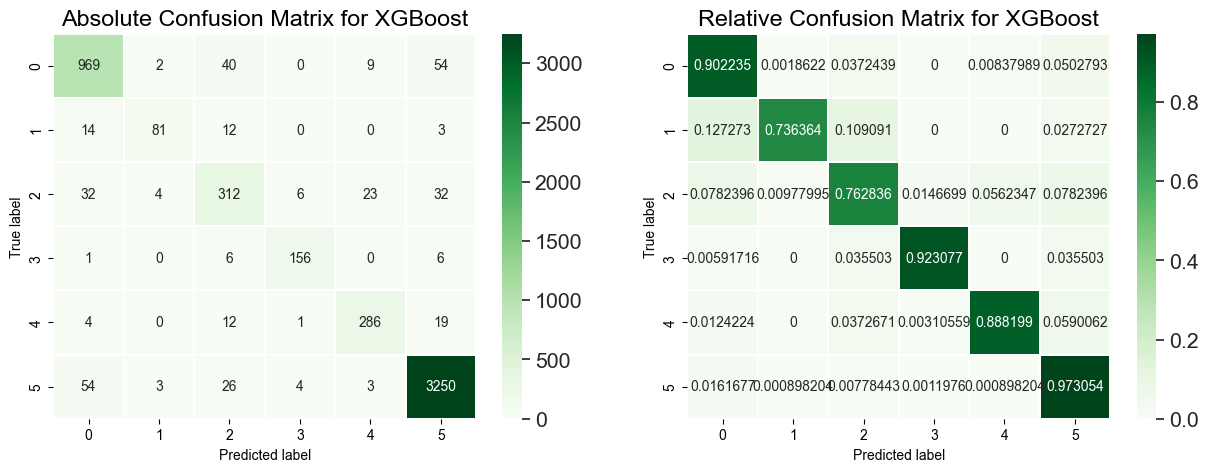

In [17]:
model = XGBoost_classification_tunned_old(best_hyperparams)

In [18]:

def while_XGBoost_classification_tunned_old(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best = 0
    best_model = None
    report = None
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y) # 70% training and 30% test
        # sm = SMOTE(random_state=100)
        # X_train, y_train = sm.fit_resample(X_train, y_train)
        # X_test, y_test = sm.fit_resample(X_test, y_test)
        
        model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train, ) # eval_set=evaluation, eval_metric=["auc","error","logloss"], verbose=False
        y_pred = model.predict(X_test)
        
        F1 = f1_score(y_test, y_pred, average='weighted')
        if F1 > best:   
            best = F1
            best_model = model
            report = classification_report(y_test, y_pred, target_names=classifications_array, digits=4)
        
    print("")
    print(report)
    return best_model

In [19]:
best_model = while_XGBoost_classification_tunned_old(best_hyperparams, cycles=25)

24
              precision    recall  f1-score   support

        CHAT     0.9212    0.9143    0.9178      1074
       EMAIL     0.9438    0.7636    0.8442       110
 FileTrasfer     0.7995    0.7800    0.7896       409
         P2P     0.9494    0.8876    0.9174       169
   STREAMING     0.8643    0.9099    0.8865       322
        VOIP     0.9680    0.9775    0.9727      3340

    accuracy                         0.9390      5424
   macro avg     0.9077    0.8722    0.8880      5424
weighted avg     0.9388    0.9390    0.9386      5424



              precision    recall  f1-score   support

        CHAT     0.9272    0.9150    0.9210       988
       EMAIL     1.0000    0.8316    0.9080        95
 FileTrasfer     0.7909    0.7951    0.7930       371
         P2P     0.8968    0.9205    0.9085       151
   STREAMING     0.9206    0.8361    0.8763       305
        VOIP     0.9647    0.9806    0.9726      3090

    accuracy                         0.9404      5000
   macro avg     0.9167    0.8798    0.8966      5000
weighted avg     0.9403    0.9404    0.9400      5000



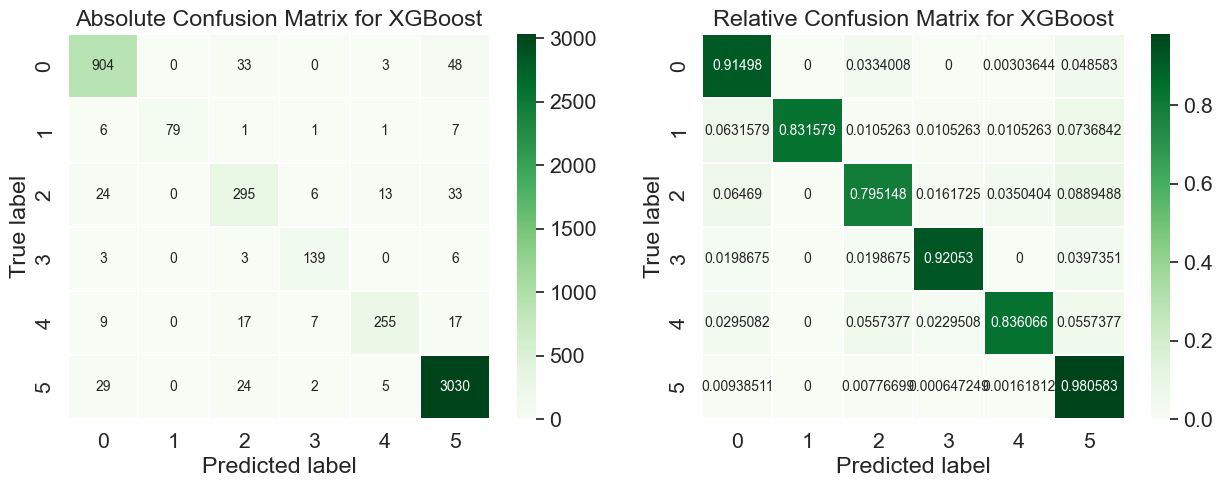

In [20]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)

print(classification_report(y_validation, y_pred, target_names=classifications_array, digits=4))

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

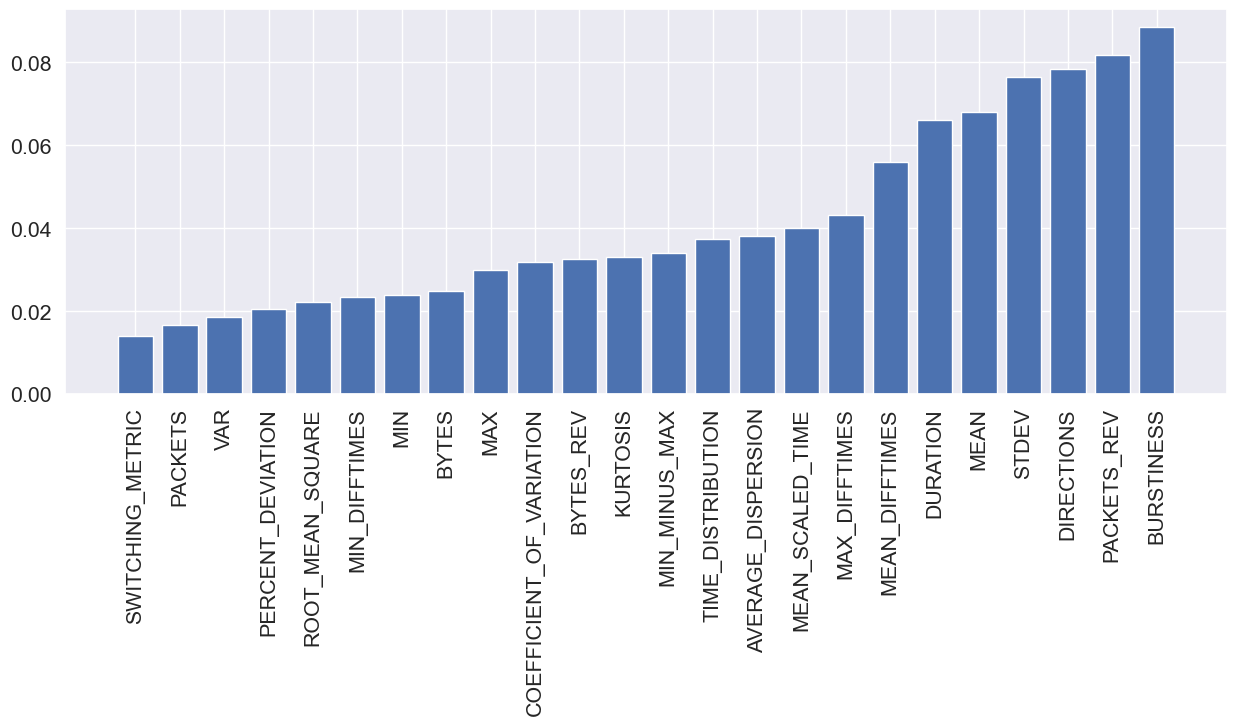

In [21]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [22]:
feat_importances.to_dict()

{'SWITCHING_METRIC': 0.014120214618742466,
 'PACKETS': 0.016636386513710022,
 'VAR': 0.01868906430900097,
 'PERCENT_DEVIATION': 0.020486921072006226,
 'ROOT_MEAN_SQUARE': 0.02223622240126133,
 'MIN_DIFFTIMES': 0.023429756984114647,
 'MIN': 0.02386784739792347,
 'BYTES': 0.024815773591399193,
 'MAX': 0.029985854402184486,
 'COEFFICIENT_OF_VARIATION': 0.03192722052335739,
 'BYTES_REV': 0.032591212540864944,
 'KURTOSIS': 0.033121366053819656,
 'MIN_MINUS_MAX': 0.03398718312382698,
 'TIME_DISTRIBUTION': 0.037395402789115906,
 'AVERAGE_DISPERSION': 0.03815760090947151,
 'MEAN_SCALED_TIME': 0.04016629233956337,
 'MAX_DIFFTIMES': 0.0431172214448452,
 'MEAN_DIFFTIMES': 0.05604156479239464,
 'DURATION': 0.0661424845457077,
 'MEAN': 0.06800941377878189,
 'STDEV': 0.07651253044605255,
 'DIRECTIONS': 0.07830167561769485,
 'PACKETS_REV': 0.08181271702051163,
 'BURSTINESS': 0.08844803273677826}